<a href="https://colab.research.google.com/github/Lannn21/ALPDM_Theo_Maulana/blob/main/ALPDM_Theo_Maulana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ALP DATAMINING

Theo Filus Handy 070602210051


Maulana Mahatir A 0705602210057

# Import Library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
!pip install kneed
from kneed import KneeLocator
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Load Data

Data Dictionary (column description)


1. **Invoice ID**: Identitas unik untuk setiap faktur atau transaksi.
2. **Branch**: Cabang atau lokasi tempat transaksi terjadi.
3. **City**: Kota tempat cabang tersebut berada.
4. **Customer Type**: Menunjukkan apakah pelanggan adalah pelanggan tetap atau pelanggan baru.
5. **Gender**: Jenis kelamin pelanggan.
6. **Product Line**: Kategori atau jenis produk yang dibeli.
7. **Unit Price**: Harga satuan dari produk.
8. **Quantity**: Jumlah unit produk yang dibeli.
9. **Tax 5%**: Jumlah pajak (5% dari total biaya) yang dikenakan pada transaksi.
10. **Total**: Total biaya transaksi, termasuk pajak.
11. **Date**: Tanggal saat transaksi dilakukan.
12. **Time**: Waktu transaksi terjadi.
13. **Payment**: Metode pembayaran yang digunakan (misalnya, kartu kredit, tunai).
14. **COGS (Cost of Goods Sold)**: Biaya langsung yang terkait dengan produksi atau pembelian produk yang dijual.
15. **Gross Margin Percentage**: Persentase margin keuntungan dari transaksi.
16. **Gross Income**: Total keuntungan yang diperoleh dari transaksi.
17. **Rating**: Penilaian atau umpan balik kepuasan pelanggan terkait transaksi.


In [ ]:
url = "https://raw.githubusercontent.com/tfilushandy/datasetalpsupermarket/refs/heads/main/supermarket_sales.csv"
df = pd.read_csv(url)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Total,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [ ]:
columns = ['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
           'Product line', 'Unit price', 'Quantity', 'Tax 5%',
           'Total', 'Date', 'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating']

for col in columns:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("\n")

Value counts for Invoice ID:
Invoice ID
750-67-8428    1
642-61-4706    1
816-72-8853    1
491-38-3499    1
322-02-2271    1
              ..
633-09-3463    1
374-17-3652    1
378-07-7001    1
433-75-6987    1
849-09-3807    1
Name: count, Length: 1000, dtype: int64


Value counts for Branch:
Branch
A    340
B    332
C    328
Name: count, dtype: int64


Value counts for City:
City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64


Value counts for Customer type:
Customer type
Member    501
Normal    499
Name: count, dtype: int64


Value counts for Gender:
Gender
Female    501
Male      499
Name: count, dtype: int64


Value counts for Product line:
Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64


Value counts for Unit price:
Unit price
83.77    3
39.62    2
24.74    2
19.15    2
73.47    2


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Exploratory Data Analysis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='Unit price', ylabel='Rating'>

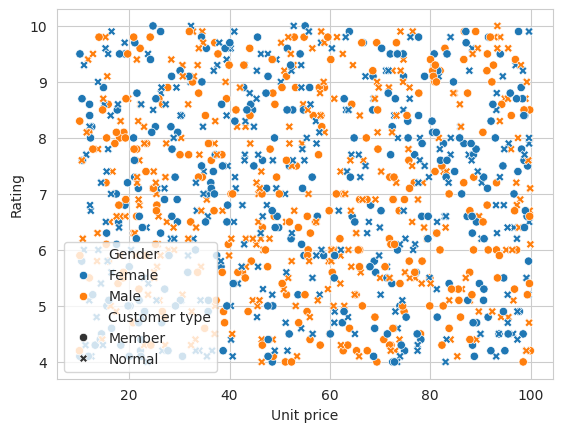

In [ ]:
sns.scatterplot(data=df, x='Unit price', y='Rating',hue='Gender',style='Customer type')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='gross income', ylabel='Density'>

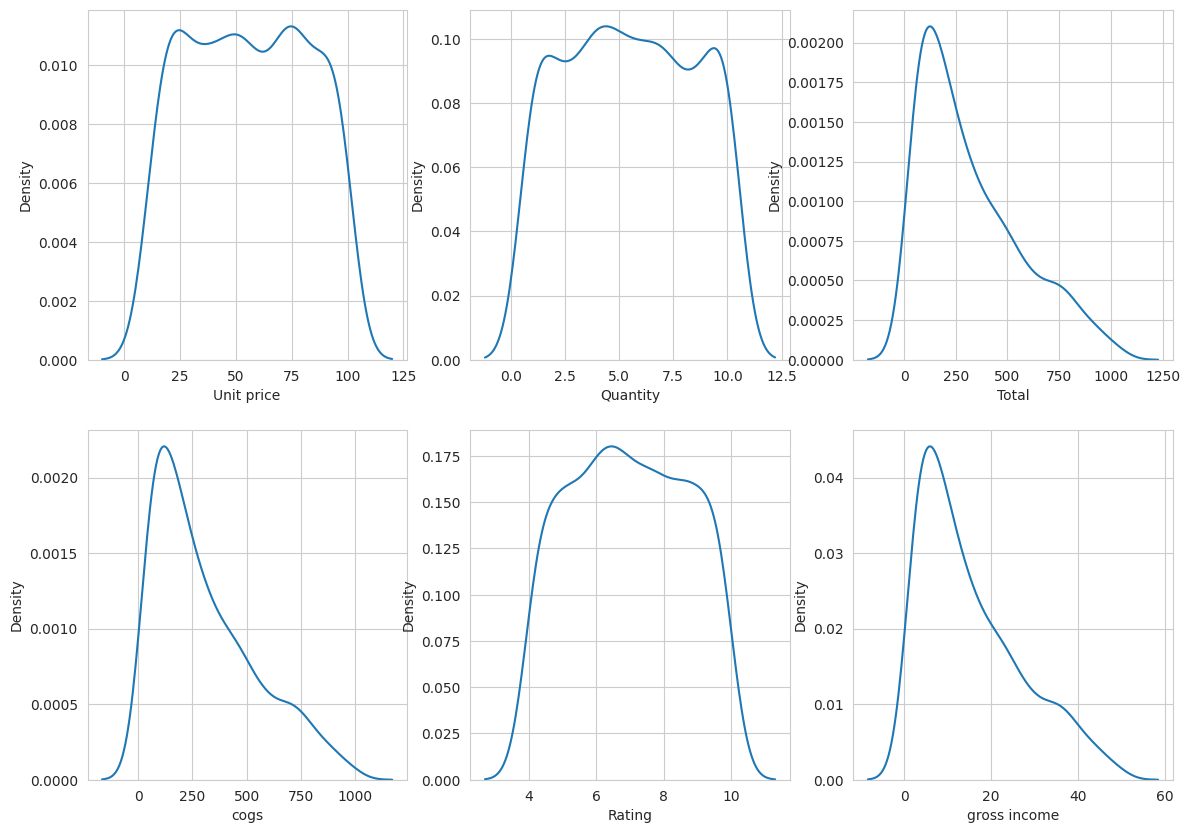

In [ ]:
plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.kdeplot(x='Unit price',data=df)
plt.subplot(2,3,2)
sns.kdeplot(x='Quantity',data=df)
plt.subplot(2,3,3)
sns.kdeplot(x='Total',data=df)
plt.subplot(2,3,4)
sns.kdeplot(x='cogs',data=df)
plt.subplot(2,3,5)
sns.kdeplot(x='Rating',data=df)
plt.subplot(2,3,6)
sns.kdeplot(x='gross income',data=df)

Unit Price (Harga Satuan):

Menunjukkan distribusi harga satuan produk.
Distribusi terlihat merata di tengah, dengan nilai harga berkisar antara sekitar 20 hingga 100.
Quantity (Kuantitas):

Menunjukkan distribusi jumlah unit produk yang dibeli.
Distribusi cenderung simetris, dengan kebanyakan transaksi memiliki jumlah kuantitas antara 2 hingga 10 unit.
Total:

Menunjukkan distribusi total biaya transaksi (termasuk pajak).
Distribusi terlihat menceng ke kanan (right-skewed), dengan sebagian besar total transaksi berada di bawah 500.
COGS (Cost of Goods Sold):

Menunjukkan distribusi biaya langsung untuk barang yang dijual.
Pola distribusinya mirip dengan Total karena hubungan langsung antara biaya produksi/pembelian barang dan total transaksi.
Rating (Penilaian Pelanggan):

Menunjukkan distribusi tingkat kepuasan pelanggan.
Distribusi terlihat simetris, dengan banyak penilaian berada di sekitar nilai 6 hingga 9.
Gross Income (Pendapatan Kotor):

Menunjukkan distribusi pendapatan kotor yang diperoleh dari transaksi.
Distribusi menceng ke kanan (right-skewed), dengan sebagian besar pendapatan kotor berada di bawah 20.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


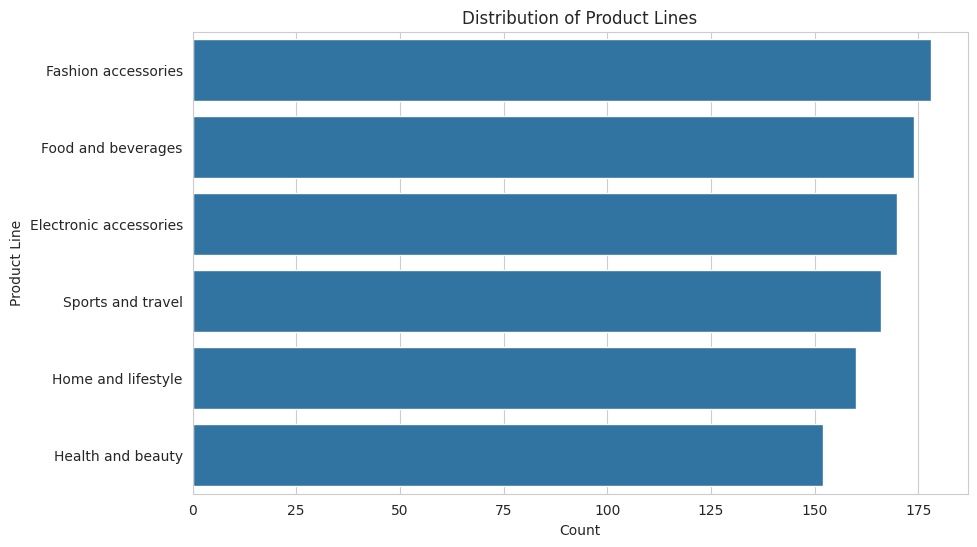

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Product line', order=df['Product line'].value_counts().index)
plt.title("Distribution of Product Lines")
plt.xlabel("Count")
plt.ylabel("Product Line")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


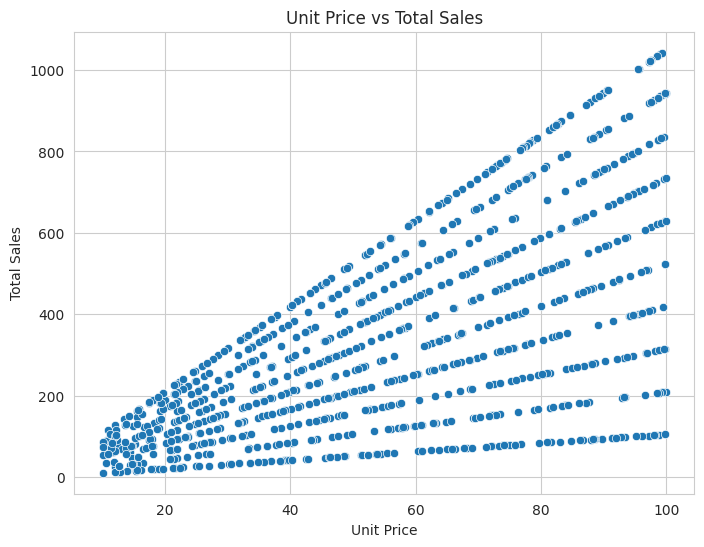

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Unit price', y='Total')
plt.title("Unit Price vs Total Sales")
plt.xlabel("Unit Price")
plt.ylabel("Total Sales")
plt.show()

# Feature Engineering

In [ ]:
# Inisialisasi encoder
label_encoder = LabelEncoder()

# Kolom yang perlu diencoding
categorical_columns = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']

# Encode setiap kolom
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

# Lihat hasil encoding
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,0,2,0,0,3,74.69,7,26.1415,548.9715,1/5/2019,13:08,2,522.83,4.761905,26.1415,9.1
1,226-31-3081,2,1,1,0,0,15.28,5,3.8200,80.2200,3/8/2019,10:29,0,76.40,4.761905,3.8200,9.6
2,631-41-3108,0,2,1,1,4,46.33,7,16.2155,340.5255,3/3/2019,13:23,1,324.31,4.761905,16.2155,7.4
3,123-19-1176,0,2,0,1,3,58.22,8,23.2880,489.0480,1/27/2019,20:33,2,465.76,4.761905,23.2880,8.4
4,373-73-7910,0,2,1,1,5,86.31,7,30.2085,634.3785,2/8/2019,10:37,2,604.17,4.761905,30.2085,5.3


In [ ]:
# Pilih kolom numerik yang ingin diskalakan
numerical_columns = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross income', 'Rating']

# Terapkan MinMaxScaler pada kolom tertentu
sc = MinMaxScaler()
df2 = pd.DataFrame(sc.fit_transform(df[numerical_columns]), columns=numerical_columns)

# Lihat hasilnya
df2.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating
0,0.718847,0.666667,0.521616,0.521616,0.521616,0.521616,0.850000
1,0.057855,0.444444,0.067387,0.067387,0.067387,0.067387,0.933333
2,0.403316,0.666667,0.319628,0.319628,0.319628,0.319628,0.566667
3,0.535603,0.777778,0.463549,0.463549,0.463549,0.463549,0.733333
4,0.848131,0.666667,0.604377,0.604377,0.604377,0.604377,0.216667


# Clustering K-means

In [ ]:
# set the parameter for evaluating K
sse = []
# check the inertia for each K
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=42)
    kmeans.fit(df2)
    sse.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


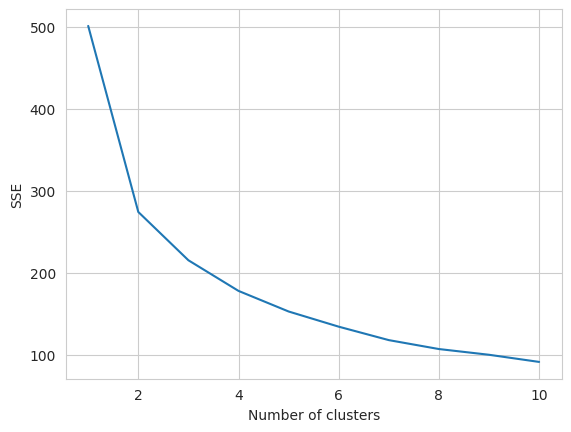

In [ ]:
# manually visualize the elbow method using plotlib
plt.plot(range(1, 11), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [ ]:
# using kneelocator to find the elbow/knee
kneedle = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
print("The best k for your model is", kneedle.elbow)

The best k for your model is 3


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
kmeans = KMeans(n_clusters=3, init='random', max_iter=300, random_state=42)
y_pred = kmeans.fit_predict(df2)
y_pred

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([0, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 0, 0, 0, 0, 2, 2, 0, 2,
       2, 1, 2, 1, 2, 2, 0, 1, 0, 0, 0, 2, 0, 2, 1, 0, 0, 1, 2, 2, 0, 0,
       2, 0, 0, 1, 1, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 2, 1, 0, 1, 2, 1,
       2, 0, 0, 2, 0, 0, 2, 0, 0, 1, 1, 1, 0, 1, 0, 2, 1, 2, 1, 0, 0, 1,
       2, 0, 2, 1, 1, 0, 2, 2, 0, 1, 2, 0, 2, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       2, 2, 0, 0, 0, 2, 1, 2, 1, 2, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       2, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 2, 0, 1, 2, 1, 0, 1,
       0, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 2, 0, 1, 1, 1, 1, 2, 0, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2,
       2, 1, 1, 2, 0, 1, 1, 1, 0, 1, 2, 0, 1, 0, 0, 2, 1, 2, 1, 2, 0, 2,
       1, 0, 1, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 1, 1, 1, 2, 1, 2,
       2, 2, 0, 1, 2, 1, 2, 0, 1, 1, 2, 2, 0, 2, 2, 1, 2, 2, 0, 2, 2, 1,
       2, 0, 2, 0, 2, 1, 1, 2, 1, 2, 0, 1, 1, 0, 0, 1, 0, 2, 2, 0, 2, 1,
       2, 1, 1, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 2, 2,

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


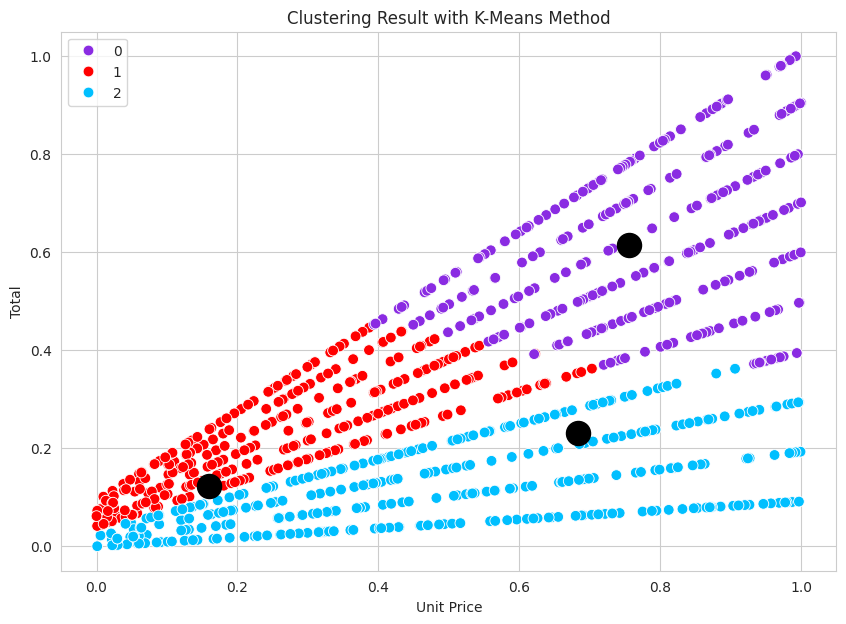

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Unit price', y='Total', hue=y_pred, palette=["blueviolet", "red", "deepskyblue"], data=df2, s=60)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=300, c="black")
plt.xlabel("Unit Price")
plt.ylabel("Total")
plt.title("Clustering Result with K-Means Method")
plt.legend()
plt.show()

In [ ]:
# Inverse transform the scaled data to get the original values
df_inverse = pd.DataFrame(sc.inverse_transform(df2), columns=numerical_columns)
# Add the cluster labels to the original data
df_inverse['Kmeans'] = y_pred
# Analyze the clusters with the original values
df_inverse.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating,Kmeans
0,74.69,7.0,26.1415,548.9715,522.83,26.1415,9.1,0
1,15.28,5.0,3.8200,80.2200,76.40,3.8200,9.6,1
2,46.33,7.0,16.2155,340.5255,324.31,16.2155,7.4,1
3,58.22,8.0,23.2880,489.0480,465.76,23.2880,8.4,0
4,86.31,7.0,30.2085,634.3785,604.17,30.2085,5.3,0


In [ ]:
kmeans_summary = df_inverse.groupby('Kmeans').agg({
    'Unit price': ['mean', 'std', 'min', 'max'],
    'Quantity': ['mean', 'std', 'min', 'max'],
    'Tax 5%': ['mean', 'std', 'min', 'max'],
    'Total': ['mean', 'std', 'min', 'max'],
    'cogs': ['mean', 'std', 'min', 'max'],
    'gross income': ['mean', 'std', 'min', 'max'],
    'Rating': ['mean', 'std', 'min', 'max'],
})

kmeans_summary

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Unit price                           Quantity                       \
             mean        std    min    max      mean       std  min   max   
Kmeans                                                                      
0       79.751351  14.088775  45.48  99.96  7.807432  1.807727  4.0  10.0   
1       34.170828  15.397322  10.08  73.28  7.156051  1.763450  5.0  10.0   
2       54.707923  25.419484  10.17  99.89  2.441026  1.149655  1.0   4.0   

           Tax 5%            ...    cogs         gross income            \
             mean       std  ...     min     max         mean       std   
Kmeans                       ...                                          
0       30.671760  7.849040  ...  373.95  993.00    30.671760  7.849040   
1       11.886855  5.200575  ...   50.80  448.60    11.886855  5.200575   
2        6.584758  4.273277  ...   10.17  366.16     6.584758  4.273277   

                           Rating                       
            min     max      mean       std  min   max  
Kmeans                                                  
0       18.6975  49.650  6.858784  1.779390  4.0  10.0  
1        2.5400  22.430  7.094268  1.693862  4.1  10.0  
2        0.5085  18.308  6.961282  1.689180  4.0  10.0  

[3 rows x 28 columns]

In [ ]:
df_inverse.groupby(y_pred)['Kmeans'].agg(pd.Series.count)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Kmeans
0,296
1,314
2,390


Dari Clusstering K mean ini didapatkan bahwa data dibagi menjadi 3 yang mana masing masingnya berisi 296, 314, dan 390

# Random Forest Classification

In [ ]:
df2['Rating_Category'] = pd.cut(
    df2['Rating'].fillna(0),
    bins=[0, 0.5, 0.75, 1],
    labels=['Low', 'Medium', 'High']
)
df2['Rating_Category'] = df2['Rating_Category'].cat.add_categories('Unknown')
df2['Rating_Category'] = df2['Rating_Category'].fillna('Unknown')

X = df2.drop(['Rating', 'Rating_Category'], axis=1)
y = df2['Rating_Category']

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display results
print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report:\n', class_report)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy: 0.41

Classification Report:
               precision    recall  f1-score   support

        High       0.23      0.22      0.22        46
         Low       0.55      0.60      0.58       102
      Medium       0.27      0.24      0.26        49
     Unknown       0.00      0.00      0.00         3

    accuracy                           0.41       200
   macro avg       0.26      0.27      0.26       200
weighted avg       0.40      0.41      0.41       200

